# Magic and Imports

In [43]:
%matplotlib widget

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Random Ternary Matrix

In [45]:
def generate_random_matrix(var, n, m=None):
    if var > 1:
        raise ValueError("Var must be <1")
    if m is None:
        m = n

    X = (np.random.rand(n, m) < var).astype(int)
    half = (np.random.rand(n, m) > 0.5)
    X[half] = -X[half]

    return X.astype(int)

In [46]:
X = generate_random_matrix(var=1, n=10)

In [47]:
X.mean(), X.var()

(0.24, 0.9424000000000002)

# Investigating Product of Independent Random Matrices

In [48]:
n = 128
ns = np.random.randint(low=512, high=513, size=10)

Xs = [generate_random_matrix(var=1/2, n=n) for _ in range(3)]

last_n = n
for n_i in ns:
    X = generate_random_matrix(var=1/last_n, n=last_n, m=n_i)
    Xs.append(X)
    last_n = n_i


In [49]:
for i, X in enumerate(Xs):
    print(f"{i} : dim {X.shape} m {np.abs(X.mean()):.2f} s {X.std():.2g}")

0 : dim (128, 128) m 0.00 s 0.71
1 : dim (128, 128) m 0.00 s 0.71
2 : dim (128, 128) m 0.00 s 0.71
3 : dim (128, 512) m 0.00 s 0.089
4 : dim (512, 512) m 0.00 s 0.044
5 : dim (512, 512) m 0.00 s 0.045
6 : dim (512, 512) m 0.00 s 0.045
7 : dim (512, 512) m 0.00 s 0.044
8 : dim (512, 512) m 0.00 s 0.045
9 : dim (512, 512) m 0.00 s 0.044
10 : dim (512, 512) m 0.00 s 0.043
11 : dim (512, 512) m 0.00 s 0.044
12 : dim (512, 512) m 0.00 s 0.042


In [50]:
Ys = []
Y = np.eye(n).astype(int)
for i, X in enumerate(Xs):
    Y = Y @ X
    Ys.append(Y)

In [51]:
for i, Y in enumerate(Ys):
    print(f"{i} : m {np.abs(Y.mean()):.2f} s {Y.std():.0f}")

0 : m 0.00 s 1
1 : m 0.07 s 6
2 : m 0.65 s 46
3 : m 0.15 s 46
4 : m 0.15 s 45
5 : m 0.09 s 45
6 : m 0.28 s 46
7 : m 0.00 s 44
8 : m 0.03 s 47
9 : m 0.09 s 44
10 : m 0.12 s 45
11 : m 0.07 s 45
12 : m 0.21 s 44


In [52]:
len(Ys)

13

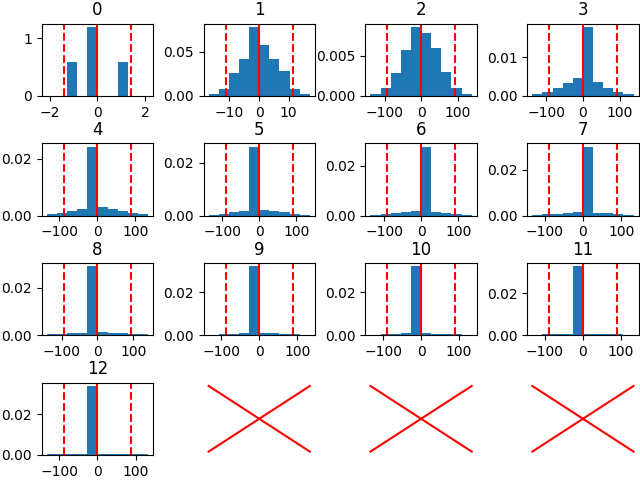

In [53]:
FIG_NAME = "distribution"
plt.close(FIG_NAME)

num_ys = len(Ys)
ceil_sqrt_num_ys = np.ceil(np.sqrt(num_ys)).astype(int)

fig, axs = plt.subplots(ceil_sqrt_num_ys, ceil_sqrt_num_ys, num=FIG_NAME)
axs = np.array(axs).flatten()

for i, (ax, Y) in enumerate(zip(axs, Ys + [None]*100)):
    if Y is None:
        ax.plot(np.linspace(-1, 1), np.linspace(-1, 1), '-', color="red")
        ax.plot(np.linspace(1, -1), np.linspace(-1, 1), '-', color="red")
        ax.axis("off")
    else:
        ax.set_title(i)

        mean = Y.mean()
        std = Y.std()

        ax.hist(Y.flatten(), range=(mean-3*std, mean+3*std), density=True)
        #ax.hist(Y.flatten(), density=True, color="cyan")

        ax.axvline(mean, color="red", ls="-")
        ax.axvline(mean+2*std, color="red", ls="--")
        ax.axvline(mean-2*std, color="red", ls="--")
        

fig.tight_layout(pad=0.1)

plt.show()

# Fraction of Empty Rows

In [54]:
x = np.arange(13) 
x = 2 ** x
y = ((x-1)/x) ** x

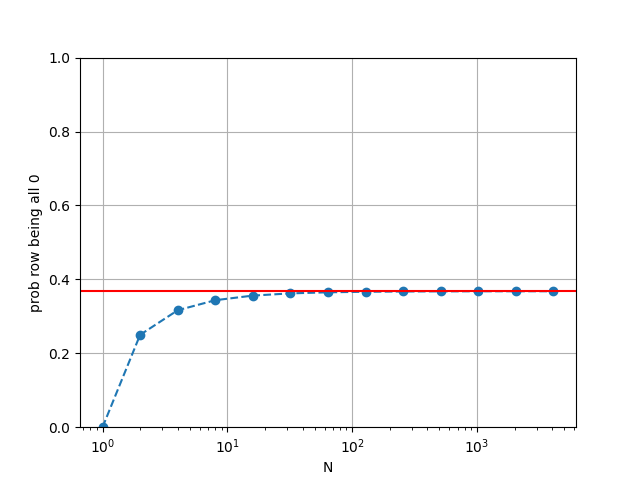

In [55]:
FIG_NAME = "1/e"
plt.close(FIG_NAME)

fig, ax = plt.subplots(1, 1, num=FIG_NAME)
ax.plot(x, y, 'o--')
ax.axhline(1/np.e, ls='-', color="red")
ax.set_xscale("log")
ax.grid()

ax.set_ylim([0, 1])

ax.set_xlabel('N')
ax.set_ylabel("prob row being all 0")

plt.show()

In [56]:
for X in Xs[-len(ns):]:
    ts = []
    for X_ in X:
        t = (X_ == 0).all()
        ts.append(t)

print(np.mean(ts))
print(1/np.e)


0.39453125
0.36787944117144233


# Bit Shifting

In [57]:
print(f"""
 -1 >> 1 = {(-1) >> 1}
  1 >> 1 = {(1) >> 1}
  0 >> 1 = {(0) >> 1}
""")


 -1 >> 1 = -1
  1 >> 1 = 0
  0 >> 1 = 0



In [58]:
ints = np.arange(-200, 200).astype(int)
shifted = np.right_shift(ints, 1)


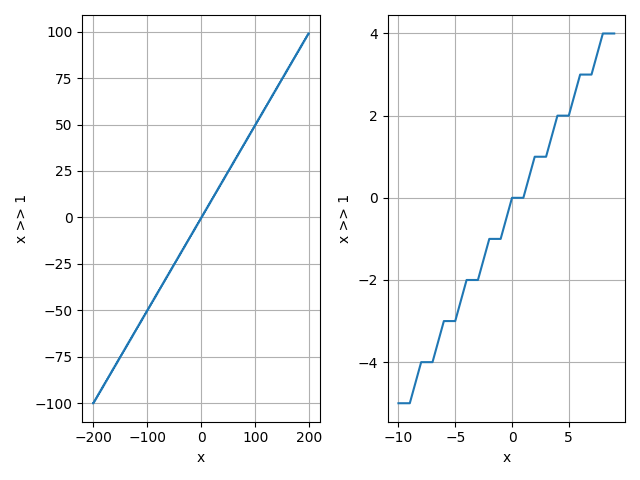

In [59]:
FIG_NAME = "bitshift"
plt.close(FIG_NAME)

fig, axs = plt.subplots(1, 2, num=FIG_NAME)

axs[0].plot(ints, shifted)
num = 20
half = len(ints) // 2
my_range = range(half - num//2, half + num//2)
axs[1].plot(ints[my_range], shifted[my_range])

for ax in axs:
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("x >> 1")

fig.tight_layout()
plt.show()

# Normalisation by Bit-Shifting

In [60]:
BIT_SHIT = 1
BIT_SHIFT_VAR = 2 ** (BIT_SHIT*2)

BIT_SHIFT_VAR, BIT_SHIT

(4, 1)

In [61]:
n = 128
ns = np.random.randint(low=512, high=513, size=10)

Xs = [generate_random_matrix(var=1, n=n) for _ in range(3)]

last_n = n
for n_i in ns:
    X = generate_random_matrix(var=BIT_SHIFT_VAR/last_n, n=last_n, m=n_i)
    Xs.append(X)
    last_n = n_i


In [62]:
for i, X in enumerate(Xs):
    print(f"{i} : dim {X.shape} m {np.abs(X.mean()):.2f} s {X.std():.2g}")

0 : dim (128, 128) m 0.00 s 1
1 : dim (128, 128) m 0.02 s 1
2 : dim (128, 128) m 0.00 s 1
3 : dim (128, 512) m 0.00 s 0.18
4 : dim (512, 512) m 0.00 s 0.089
5 : dim (512, 512) m 0.00 s 0.088
6 : dim (512, 512) m 0.00 s 0.088
7 : dim (512, 512) m 0.00 s 0.088
8 : dim (512, 512) m 0.00 s 0.089
9 : dim (512, 512) m 0.00 s 0.088
10 : dim (512, 512) m 0.00 s 0.089
11 : dim (512, 512) m 0.00 s 0.088
12 : dim (512, 512) m 0.00 s 0.089


In [63]:
Ys = []
Y = np.eye(n).astype(int)
for i, X in enumerate(Xs):
    Y = Y @ X
    Y = np.right_shift(Y, BIT_SHIT)
    Ys.append(Y)

In [64]:
for i, Y in enumerate(Ys):
    print(f"{i} : m {np.abs(Y.mean()):.2f} s {Y.std():.0f}")

0 : m 0.50 s 0
1 : m 0.79 s 4
2 : m 1.30 s 24
3 : m 1.23 s 24
4 : m 0.27 s 24
5 : m 0.65 s 23
6 : m 0.07 s 23
7 : m 0.30 s 23
8 : m 0.27 s 23
9 : m 1.29 s 22
10 : m 0.64 s 23
11 : m 0.49 s 23
12 : m 0.58 s 23


In [65]:
len(Ys)

13

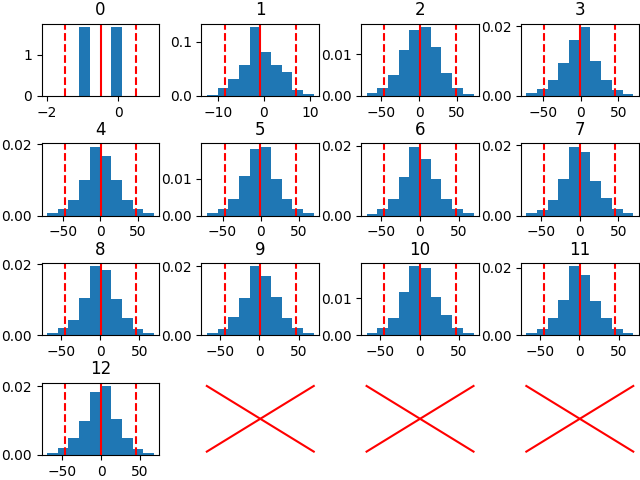

In [66]:
FIG_NAME = "distribution"
plt.close(FIG_NAME)

num_ys = len(Ys)
ceil_sqrt_num_ys = np.ceil(np.sqrt(num_ys)).astype(int)

fig, axs = plt.subplots(ceil_sqrt_num_ys, ceil_sqrt_num_ys, num=FIG_NAME)
axs = np.array(axs).flatten()

for i, (ax, Y) in enumerate(zip(axs, Ys + [None]*100)):
    if Y is None:
        ax.plot(np.linspace(-1, 1), np.linspace(-1, 1), '-', color="red")
        ax.plot(np.linspace(1, -1), np.linspace(-1, 1), '-', color="red")
        ax.axis("off")
    else:
        ax.set_title(i)

        mean = Y.mean()
        std = Y.std()

        ax.hist(Y.flatten(), range=(mean-3*std, mean+3*std), density=True)
        #ax.hist(Y.flatten(), density=True, color="cyan")

        ax.axvline(mean, color="red", ls="-")
        ax.axvline(mean+2*std, color="red", ls="--")
        ax.axvline(mean-2*std, color="red", ls="--")
        

fig.tight_layout(pad=0.1)

plt.show()

# Fraction of Empty Rows - Again

In [67]:
x = np.arange(13)  + 1
x = 2 ** x
x = x[x > 4]

y = ((x-4)/x) ** x

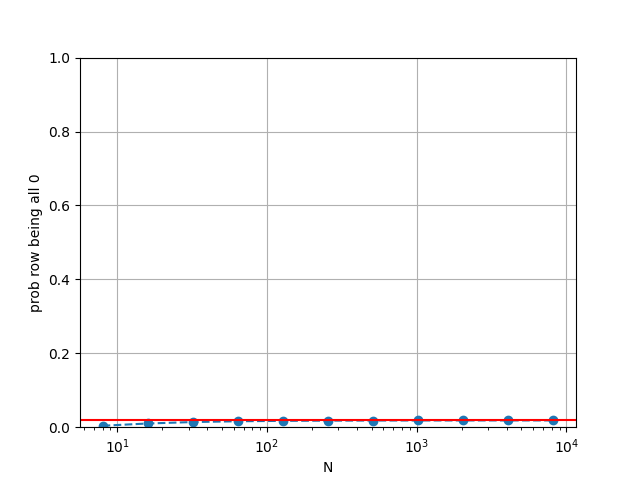

In [68]:
FIG_NAME = "e^-4"
plt.close(FIG_NAME)

fig, ax = plt.subplots(1, 1, num=FIG_NAME)
ax.plot(x, y, 'o--')
ax.axhline(np.exp(-4), ls='-', color="red")
ax.set_xscale("log")
ax.grid()

ax.set_ylim([0, 1])

ax.set_xlabel('N')
ax.set_ylabel("prob row being all 0")

plt.show()

In [69]:
np.exp(-4)

0.01831563888873418

In [70]:
bitshifts = np.arange(0, 5)
bitshift_vars = 2 ** (bitshifts*2)

probs = np.exp(-bitshift_vars)

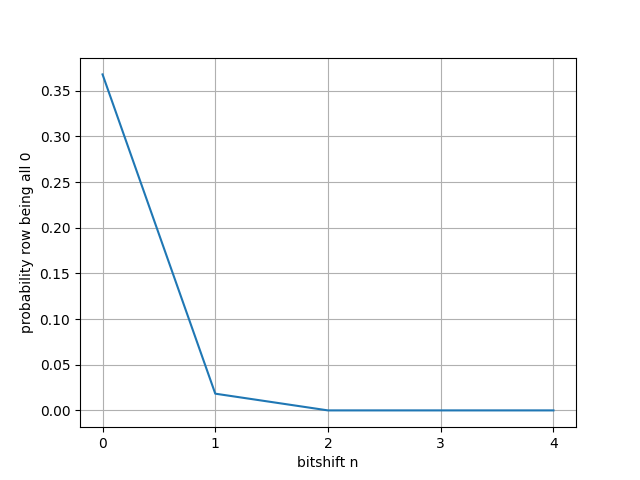

In [71]:
FIG_NAME = "bitshift zero rows"
plt.close(FIG_NAME)

fig, ax = plt.subplots(1, 1, num=FIG_NAME)

ax.plot(bitshifts, probs)
ax.set_xlabel("bitshift n")
ax.set_ylabel("probability row being all 0")

ax.grid()
ax.set_xticks(bitshifts)
plt.show()

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def round_up_to_power_of_n(x, n):
    log_n = np.log(x) / np.log(n)
    ceil_log_n = np.ceil(log_n)
    round_up = n ** ceil_log_n
    return round_up

round_up_to_power_of_n(np.arange(1, 20), 2)

array([ 1.,  2.,  4.,  4.,  8.,  8.,  8.,  8., 16., 16., 16., 16., 16.,
       16., 16., 16., 32., 32., 32.])

In [88]:
n = np.arange(2, 10000)
optimal_bits_int = np.ceil(2*np.log(n)/np.log(2))
bits_int = round_up_to_power_of_n(x=optimal_bits_int, n=2)
sparsity_for_equality = (2 / (1 + bits_int))

In [89]:
n

array([   2,    3,    4, ..., 9997, 9998, 9999])

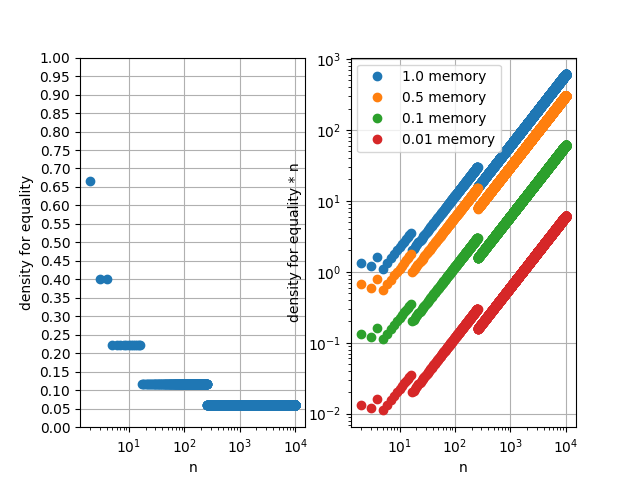

In [114]:
FIG_NAME = "sparsity"
plt.close(FIG_NAME)

fig, axs = plt.subplots(1, 2, num=FIG_NAME)

axs[0].plot(n, sparsity_for_equality, 'o')
axs[0].set_ylabel("density for equality")
axs[0].set_yticks(np.arange(21)/20)

axs[1].plot(n, sparsity_for_equality * n, 'o', label = "1.0 memory")
axs[1].plot(n, sparsity_for_equality * n / 2, 'o', label = "0.5 memory")
axs[1].plot(n, sparsity_for_equality * n / 10, 'o', label = "0.1 memory")
axs[1].plot(n, sparsity_for_equality * n / 100, 'o', label = "0.01 memory")
axs[1].set_ylabel("density for equality * n")
axs[1].set_yscale("log")
axs[1].legend()

for ax in axs:
    ax.set_xscale("log")
    ax.set_xlabel("n")
    ax.grid()

plt.show()

In [107]:
xx, yy = np.meshgrid(np.linspace(0, 3, 200), np.linspace(0, 3, 200))

In [108]:
xx_e = xx / np.log10(np.e)
yy_e = yy / np.log10(np.e)

bits_per_int = np.ceil(2*(xx_e)/(np.log(2)))
ln_memory_save = yy_e - np.log(2 / (1+bits_per_int)) - xx_e
log10_memory_save = ln_memory_save / np.log(10)

In [109]:
ln_memory_save.min()

-4.55638002181866

In [110]:
from matplotlib.colors import TwoSlopeNorm

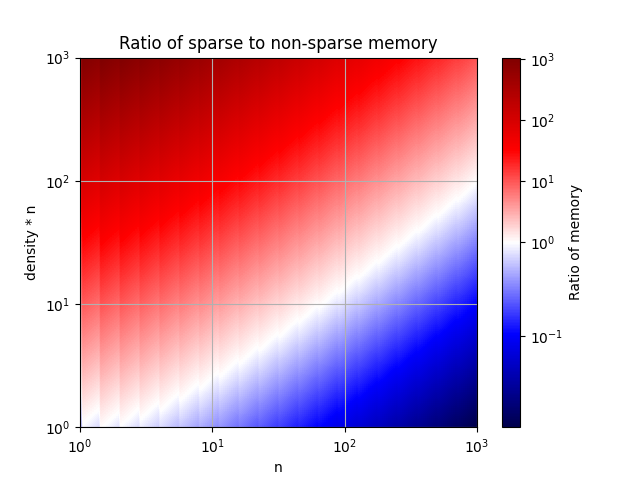

In [111]:
FIG_NAME = "image"
plt.close(FIG_NAME)

plt.subplots(1, 1, num=FIG_NAME)

plt.imshow(
    log10_memory_save, 
    cmap="seismic",
    norm=TwoSlopeNorm(vcenter=0),
    extent=(xx.min(), xx.max(), yy.max(), yy.min()),
    aspect="auto",
)

ax = plt.gca()
ax.invert_yaxis()

xticks = np.arange(xx.min(), xx.max()+1)
yticks = np.arange(yy.min(), yy.max()+1)

ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{int(p)}$" for p in xticks])
ax.set_yticks(yticks)
ax.set_yticklabels([f"$10^{int(p)}$" for p in yticks])

ax.set_xlabel("n")
ax.set_ylabel("density * n")

cticks = np.arange(np.floor(log10_memory_save.min()), np.ceil(log10_memory_save.max()), 1)
cbar = plt.colorbar(ticks=cticks)
cbar.ax.set_yticklabels(labels=[f"$10^{{{int(p)}}}$" for p in cticks])
cbar.ax.set_ylabel("Ratio of memory")

ax.grid()

plt.title("Ratio of sparse to non-sparse memory")

plt.show()

In [81]:

n = 2 ** (np.arange(20) + 1)
bits_int = np.ceil(2*np.log(n)/np.log(2))
sparsity_for_equality = (2 / (1 + bits_int))